In [60]:
"""


"""
#

import os
os.chdir('D:/Collection_Dataset/Data')

# process arrays and dataframes
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100, "display.max_rows", 50)


#
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

import xgboost as xgb

#
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#
from IPython.display import display

In [26]:
"""
Input Variables
"""

df_churn = pd.read_excel('customer_churn_telco.xlsx')

df_churn.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason', 
               'CustomerID', 'Count', 'Country', 'State', 'Lat Long'], axis = 1, inplace = True)

# display(df_churn)

In [27]:
"""
Data Cleaning
"""

df_churn['City'].replace(' ', '_', regex = True, inplace = True)

df_churn.columns = df_churn.columns.str.replace(' ', '_') # the final charting would not accept names with space in between
# XGBoost is not impacted by the space though

df_churn

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [39]:
# df_churn['Total_Charges'] = df_churn['Total_Charges'].str.replace(' ', '0')
# df_churn['Total_Charges'] = df_churn['Total_Charges'].astype('float')
df_churn['Total_Charges'] = pd.to_numeric(df_churn['Total_Charges']) # better for not limited to current dtypes

df_churn.replace(' ', '_', regex = True, inplace = True)

df_churn

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,NaN,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,NaN,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,NaN,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,NaN,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,Yes,Bank_transfer_(automatic),21.15,NaN,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check,84.80,NaN,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic),103.20,NaN,0
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No_phone_service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic_check,29.60,NaN,0


In [40]:
X = df_churn.drop(['Churn_Value'], axis = 1).copy()

y = df_churn['Churn_Value'].copy()

In [46]:
# One-hot encoding is not suitable for linear or logistic regression, but it works great for trees.

X_encoded = pd.get_dummies(X, columns = ['City', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 
                                         'Phone_Service', 'Multiple_Lines', 'Internet_Service', 
                                         'Online_Security', 'Online_Backup', 'Device_Protection', 
                                         'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 
                                         'Contract', 'Paperless_Billing', 'Payment_Method'])
# X_encoded.dtypes
# X_encoded

In [47]:
"""

"""

print(sum(y)/ len(y))

0.2653698707936959


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

print(sum(y_train)/ len(y_train))
print(sum(y_test)/ len(y_test))

0.2654297614539947
0.26519023282226006


In [53]:
# create a shell for XGBClassifier
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', 
                            missing = None, # what value do we use to represent missing value, default = None 
                            seed = 42)

# Fit the dataset
clf_xgb.fit(X_train, y_train, 
            verbose = True, 
            early_stopping_rounds = 10, 
            eval_metric = 'aucpr', 
            eval_set = [(X_test, y_test)])

#

[0]	validation_0-aucpr:0.63337
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.63957
[2]	validation_0-aucpr:0.65280
[3]	validation_0-aucpr:0.65177
[4]	validation_0-aucpr:0.65094
[5]	validation_0-aucpr:0.65820
[6]	validation_0-aucpr:0.65487
[7]	validation_0-aucpr:0.65477
[8]	validation_0-aucpr:0.65858
[9]	validation_0-aucpr:0.65624
[10]	validation_0-aucpr:0.65744
[11]	validation_0-aucpr:0.65962
[12]	validation_0-aucpr:0.65846
[13]	validation_0-aucpr:0.65901
[14]	validation_0-aucpr:0.65598
[15]	validation_0-aucpr:0.65417
[16]	validation_0-aucpr:0.65240
[17]	validation_0-aucpr:0.65127
[18]	validation_0-aucpr:0.64982
[19]	validation_0-aucpr:0.65358
[20]	validation_0-aucpr:0.65417
[21]	validation_0-aucpr:0.65402
Stopping. Best iteration:
[11]	validation_0-aucpr:0.65962



XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

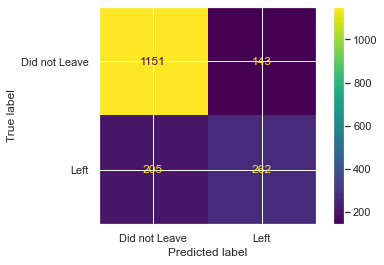

In [61]:
plot_confusion_matrix(clf_xgb, 
                      X_test, y_test, 
                      values_format = 'd',
                      display_labels = ['Did not Leave', 'Left'])

In [64]:
"""
Improve the performance of the classifier:

    # max_depth
    # learning_ratem, aka gamma (or "eta")
    # 
    
"""

# scale_pos_weight
    # 
    
param_grid = {
    'max_depth': [3, 4 ,5], 
    'learning_rate': [0.1, 0.01, 0.05], 
    'gamma': [0.25], 
    'reg_lambda': [10.2, 20, 100], 
    'scale_pos_weight': [3]
}

# Note to speed up cross validation and prevent over-fitting, 
    # we only use a random subset of the data 
    
optimal_params = GridSearchCV(xgb.XGBClassifier(objective = 'binary:logistic', 
                                  seed = 42, 
                                  subsample = 0.9, 
                                  colsample_bytree = 0.5), 
                              param_grid = param_grid, 
                              scoring = 'roc_auc', 
                              verbose = 0, 
                              n_jobs = 10, 
                              cv = 5)

optimal_params.fit(X_train, y_train, 
                  early_stopping_rounds = 10, 
                  eval_metric = 'auc', 
                  eval_set = [(X_test, y_test)], 
                  verbose = False)

print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 3}


In [69]:
"""
After getting the right parameters, we can build the final XGBoost Model:
"""

clf_xgb_final = xgb.XGBClassifier(seed = 42, 
                                 objective = 'binary:logistic', 
                                 gamma = 0.25, 
                                 learning_rate = 0.1, 
                                 max_depth = 4, 
                                 reg_lambda = 100, 
                                 scale_pos_weight = 3, 
                                 sub_sample = 0.9, 
                                 colsample_bytree = 0.5)

clf_xgb_final.fit(X_train, y_train, 
                 verbose = True, 
                 early_stopping_rounds = 10, 
                 eval_metric = 'aucpr', 
                 eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.55700
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.57813
[2]	validation_0-aucpr:0.59481
[3]	validation_0-aucpr:0.59943
[4]	validation_0-aucpr:0.59979
[5]	validation_0-aucpr:0.59838
[6]	validation_0-aucpr:0.60736
[7]	validation_0-aucpr:0.60754
[8]	validation_0-aucpr:0.61440
[9]	validation_0-aucpr:0.62112
[10]	validation_0-aucpr:0.62368
[11]	validation_0-aucpr:0.62589
[12]	validation_0-aucpr:0.62913
[13]	validation_0-aucpr:0.63021
[14]	validation_0-aucpr:0.62864
[15]	validation_0-aucpr:0.62996
[16]	validation_0-aucpr:0.63007
[17]	validation_0-aucpr:0.63071
[18]	validation_0-aucpr:0.63079
[19]	validation_0-aucpr:0.63103
[20]	validation_0-aucpr:0.63152
[21]	validation_0-aucpr:0.63221
[22]	validation_0-aucpr:0.63270
[23]	validation_0-aucpr:0.63269
[24]	validation_0-aucpr:0.63262
[25]	validation_0-aucpr:0.63292
[26]	validation_0-aucpr:0.63496
[27]	validation_0-aucpr:0.63556
[28]	validation_0-aucpr:0.63647
[29]	validation_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=100, scale_pos_weight=3, seed=42, sub_sample=0.9,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

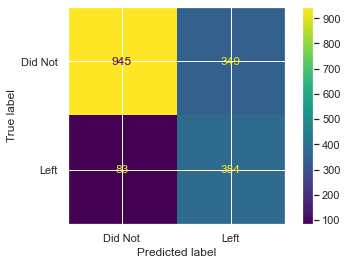

In [70]:
plot_confusion_matrix(clf_xgb_final, 
                     X_test,
                     y_test, 
                     values_format = 'd', 
                     display_labels = ['Did Not', 'Left'])

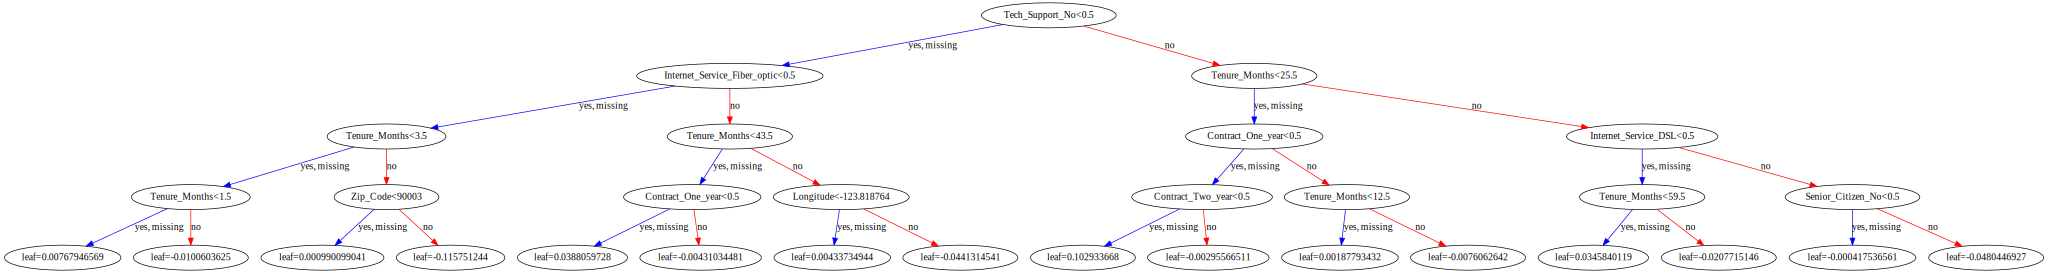

In [77]:
clf_xgb_selected = xgb.XGBClassifier(seed = 42, 
                                    objective = 'binary:logistic', 
                                    gamma = 0.25, 
                                    learning_rate = 0.1, 
                                    max_depth = 4, 
                                    reg_lambda = 100, 
                                    scale_pos_weight = 3, 
                                    subsample = 0.9, 
                                    colsample_bytree = 0.5, 
                                    n_estimators = 1)

clf_xgb_selected.fit(X_train, y_train)



xgb.to_graphviz(clf_xgb_selected, 
               num_trees = 0, 
               size = "10, 10")

In [79]:
bst = clf_xgb_selected.get_booster()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    
    print('%s:' % importance_type, bst.get_score(importance_type = importance_type))

weight: {'Tech_Support_No': 1, 'Internet_Service_Fiber_optic': 1, 'Tenure_Months': 6, 'Zip_Code': 1, 'Contract_One_year': 2, 'Longitude': 1, 'Contract_Two_year': 1, 'Internet_Service_DSL': 1, 'Senior_Citizen_No': 1}
gain: {'Tech_Support_No': 1029.31604, 'Internet_Service_Fiber_optic': 133.476685, 'Tenure_Months': 74.59779601449999, 'Zip_Code': 3.65631104, 'Contract_One_year': 18.9362936, 'Longitude': 4.72257614, 'Contract_Two_year': 7.82769775, 'Internet_Service_DSL': 50.5820847, 'Senior_Citizen_No': 3.67398071}
cover: {'Tech_Support_No': 1820.25, 'Internet_Service_Fiber_optic': 742.75, 'Tenure_Months': 364.5833333333333, 'Zip_Code': 451.75, 'Contract_One_year': 402.0, 'Longitude': 116.75, 'Contract_Two_year': 685.5, 'Internet_Service_DSL': 373.75, 'Senior_Citizen_No': 98.75}
total_gain: {'Tech_Support_No': 1029.31604, 'Internet_Service_Fiber_optic': 133.476685, 'Tenure_Months': 447.586776087, 'Zip_Code': 3.65631104, 'Contract_One_year': 37.8725872, 'Longitude': 4.72257614, 'Contract_T

In [80]:
node_params = {'shape': 'box', 
              'style': 'filled, rounded', 
              'fillcolor': '#78cbe'}

leaf_params = {'shape': 'box', 
              'style': 'filled', 
              'fillcolor': '#e48038'}

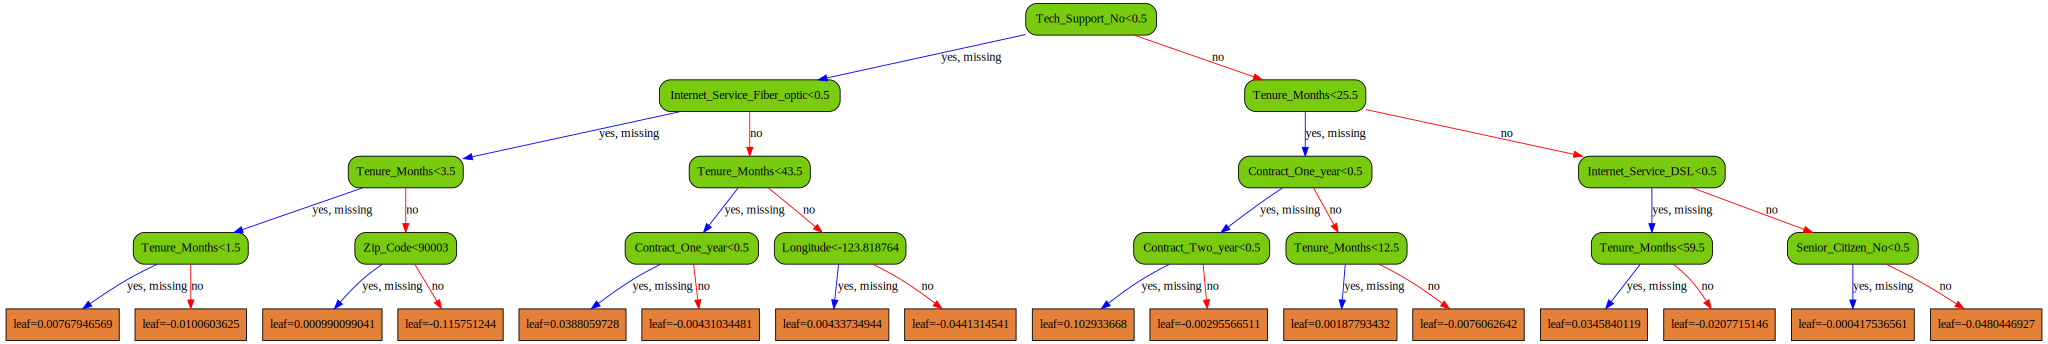

In [85]:
xgb.to_graphviz(clf_xgb_selected, 
               num_trees = 0, 
               size = "3, 3", 
               condition_node_params = node_params, 
               leaf_node_params = leaf_params)